<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/MLBB_Heroes_Starting_with_the_best_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MLBB Heroes Starting with the best stats!**

Link to the original dataset is here: https://www.kaggle.com/datasets/kishan9044/mobile-legends-bang-bang?resource=download
***
**Objective**

To perform analysis on the dataset to determine the heroes which start with the best stats.
***
**Brief Notes on the Dataset**

Dataset contains hero stats til Mobile Legends Version Patch 1.7.20 September 20, 2022.

There are 117 heroes in Mobile legends as of September 20, 2022. However the heroes Sun, Tigreal and Saber have been excluded as there is no  available data.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/whtan88/DataSet/main/Mlbb_Heroes.csv")

df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


We will do a quick inspection of the database.

There are 114 rows but there appears to be a missing data point in the Mana Regen column. A quick check of the file shows that the missing data line is from the hero Yin. We can default it to 0 value.

In [2]:
df.describe()

,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
count,114.000000,114.000000,114.000000,113.000000,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2577.850877,7.698246,339.368421,14.929204,115.929825,0.0,19.201754,14.912281,251.175439,289.859649,289.710526
std,213.281700,1.639392,215.071598,22.981249,9.826566,0.0,3.582603,0.659329,8.665102,275.362187,273.140753
min,918.000000,3.800000,0.000000,0.000000,90.000000,0.0,10.000000,10.000000,240.000000,0.000000,3.000000
25%,2501.000000,6.800000,100.000000,4.000000,110.000000,0.0,17.000000,15.000000,240.000000,68.250000,71.750000
50%,2573.000000,7.200000,436.500000,15.000000,116.500000,0.0,19.000000,15.000000,251.000000,226.500000,222.500000
75%,2706.250000,8.000000,490.000000,18.000000,122.500000,0.0,22.000000,15.000000,260.000000,465.000000,457.750000
max,2909.000000,18.400000,750.000000,240.000000,140.000000,0.0,27.000000,15.000000,270.000000,1357.000000,1529.000000


In [3]:
df[df['Mana_Regen'].isnull()]

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
108,Yin,Martial Genius,"I AM YIN, AND WILL ALWAYS BE, NO MATTER WHAT!",2022-01-18,Fighter,NaN,EXP Lane,2578,9.8,0,NaN,109,0,21,15,252,52,45


In [4]:
df['Mana_Regen'] = df['Mana_Regen'].fillna(0)

df.describe()

,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2577.850877,7.698246,339.368421,14.798246,115.929825,0.0,19.201754,14.912281,251.175439,289.859649,289.710526
std,213.281700,1.639392,215.071598,22.922022,9.826566,0.0,3.582603,0.659329,8.665102,275.362187,273.140753
min,918.000000,3.800000,0.000000,0.000000,90.000000,0.0,10.000000,10.000000,240.000000,0.000000,3.000000
25%,2501.000000,6.800000,100.000000,3.250000,110.000000,0.0,17.000000,15.000000,240.000000,68.250000,71.750000
50%,2573.000000,7.200000,436.500000,15.000000,116.500000,0.0,19.000000,15.000000,251.000000,226.500000,222.500000
75%,2706.250000,8.000000,490.000000,18.000000,122.500000,0.0,22.000000,15.000000,260.000000,465.000000,457.750000
max,2909.000000,18.400000,750.000000,240.000000,140.000000,0.0,27.000000,15.000000,270.000000,1357.000000,1529.000000


That's better. We have also verified that the key columns (Name, Primary Role & Lane) do not have missing data as well. Now we can start on some data visualization. We can start to explore some stats on the Primary roles and the supposed lanes as well. We will ignore the Secondary Role for data analysis purposes. This is also to prevent skewing the data when we try to look at the stats distribution of each of the roles as well.

In [5]:
print('Missing data in Name column : ' + str(df['Name'].isnull().sum().sum()))
print('Missing data in Primary_Role column : ' + str(df['Primary_Role'].isnull().sum().sum()))
print('Missing data in Secondary_Role column : ' + str(df['Secondary_Role'].isnull().sum().sum()))
print('Missing data in Lane column : ' + str(df['Lane'].isnull().sum().sum()))

Missing data in Name column : 0
Missing data in Primary_Role column : 0
Missing data in Secondary_Role column : 84
Missing data in Lane column : 0


Let's proceed to take a closer look at the primary roles and the usual lanes which the heroes are to go to, which reflects the current meta of the game.

In [6]:
pivot = pd.pivot_table(df, values='Name',
                             index='Primary_Role',
                             aggfunc='count')
pivot

,Name
Primary_Role,
Assassin,13
Fighter,33
Mage,25
Marksman,18
Support,9
Tank,16


As you can see from the pivot table below, majority of the heroes of a primary role will belong to a lane type, but there are some outliers which differ slightly. For example, for the assassin, there is 1 hero that has the primary lane as EXP lane. We will now take a deeper look at these outliers.

In [7]:
pivot = pd.pivot_table(df, values='Name',
                             index='Primary_Role',
                             columns='Lane',
                             aggfunc='count')
pivot

Lane,EXP Lane,Gold Lane,Jungler,Mid,Roamer
Primary_Role,,,,,
Assassin,1.0,NaN,12.0,NaN,NaN
Fighter,27.0,3.0,3.0,NaN,NaN
Mage,2.0,NaN,NaN,23.0,NaN
Marksman,NaN,18.0,NaN,NaN,NaN
Support,NaN,NaN,NaN,NaN,9.0
Tank,4.0,NaN,1.0,NaN,11.0


In [8]:
df.query('Primary_Role == "Assassin" & Lane == "EXP Lane"')

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
18,Benedetta,Shadow Ranger,"When the body suffers, the spirit blooms.",2020-11-07,Assassin,NaN,EXP Lane,2569,6.6,460,16.0,113,0,18,15,255,477,471


In [9]:
df.query('Primary_Role == "Mage" & Lane == "EXP Lane"')

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
30,Esmeralda,Astrologer,Secondary Role,2019-04-02,Mage,Tank,EXP Lane,2573,7.2,502,20.0,114,0,21,15,240,1357,1529


In [10]:
df.query('Primary_Role == "Fighter" & Lane == "Gold Lane"')

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
24,Chou,Kung-Fu Boy,Primary Role,2016,Fighter,NaN,Gold Lane,2708,7.8,0,0.0,121,0,23,15,260,1139,1057
45,Guinevere,Ms. Violet,Primary Role,2019-02-21,Fighter,NaN,Gold Lane,2528,7.8,0,0.0,126,0,18,15,260,18,26
113,Zilong,Spear of Dragon,The Dragonborn is back!,2016,Fighter,Assassin,Gold Lane,2689,7.0,405,16.0,123,0,25,15,265,5,23


In [11]:
df.loc[df["Name"] == "Zilong", "Lane"] = "EXP Lane"
df.loc[df["Name"] == "Chou", "Lane"] = "EXP Lane"
df.loc[df["Name"] == "Guinevere", "Lane"] = "EXP Lane"

df.query('Primary_Role == "Fighter" & Lane == "Gold Lane"')

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss


Base on my current understanding of the meta, I have adjusted the lanes of some of the heroes with the few lines of codes above accordingly.

Kindly note that this distribution of roles to the respective lanes reflect the current meta at the moment, and this may change in future.

____________________________________

**Exploratory Data Analysis**

Next, lets take a look at the distribution of stats for each of the respective primary roles.

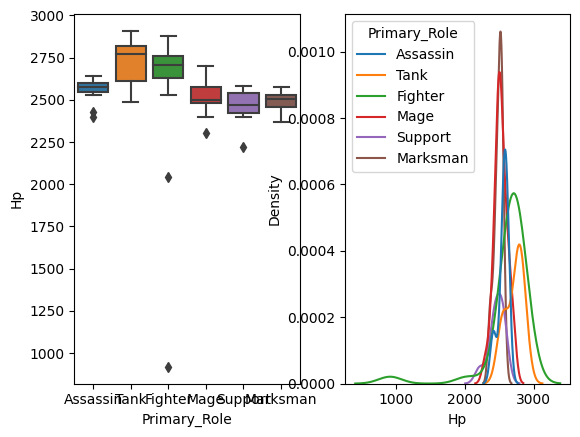

In [12]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x="Primary_Role", y="Hp", data=df, ax=axes[0])
sns.kdeplot(data=df, x="Hp", hue="Primary_Role", ax=axes[1])
plt.show()

The left chart above is a boxplot graph by primary role of the heroes' health. From the boxplot, we can see that the health of the heroes by primary role is as per expected, with the tank and fighters having higher health relative to the other heroes. The distribution of the health of each hero by primary role is also relatively clustered to the mean visually. There are a few outliers but that is to be expected. It is interesting to note that the health of assassins are generally the same, as they are the most tightly clustered.

The right chart above shows the density plot by primary role of heroes' health. It confirms what we see from the boxplot, and visually, we can see that there is a distribution of kurtosis between each of the primary roles. For example, we can see that mage and marksmen heroes appear to have the most positive kurtosis, and the others have a lower peak.

Let's try to visualise the density plot of HP by the primary role differently and see if we can visualise it better via the below density plots.

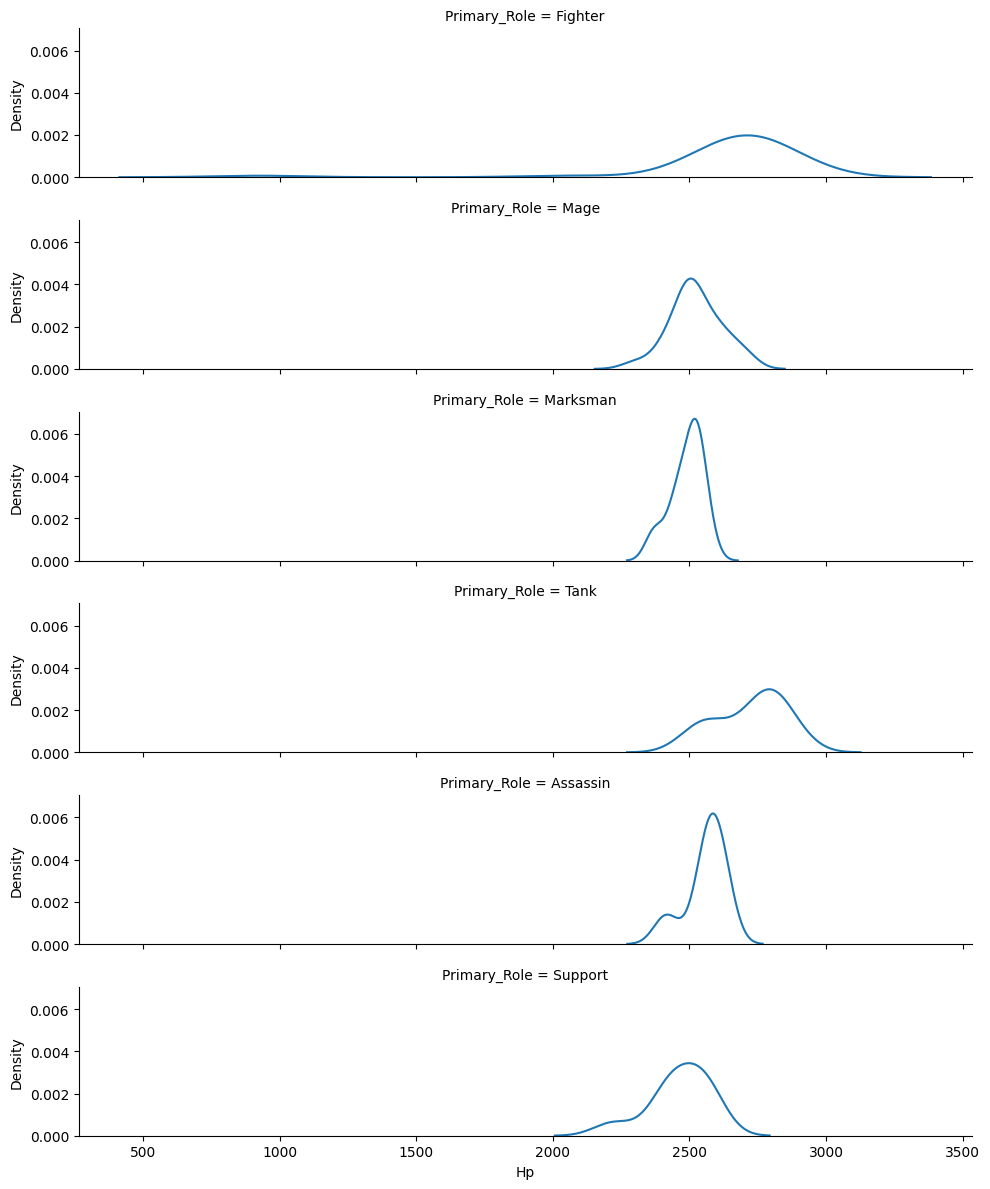

In [13]:
g = sns.FacetGrid(df, row="Primary_Role", row_order=df.Primary_Role.value_counts().index,
                  height=2, aspect=5,palette="Set2")
g.map(sns.kdeplot, "Hp")
g.figure.subplots_adjust(wspace=0.2, hspace=0.2)

Oops, it doesn't appear to be the case, let's revert to the prior visualisation charts and take a look at the rest of the stats of the heroes by their primary roles.

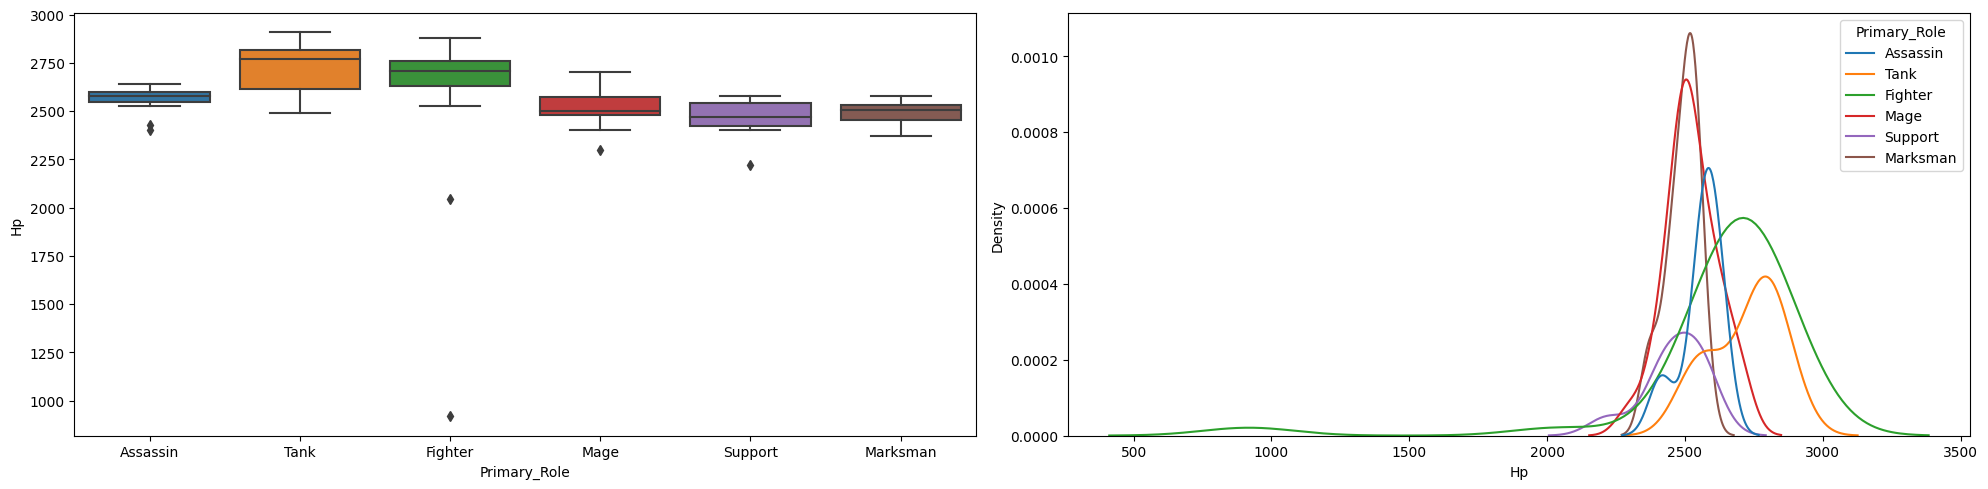

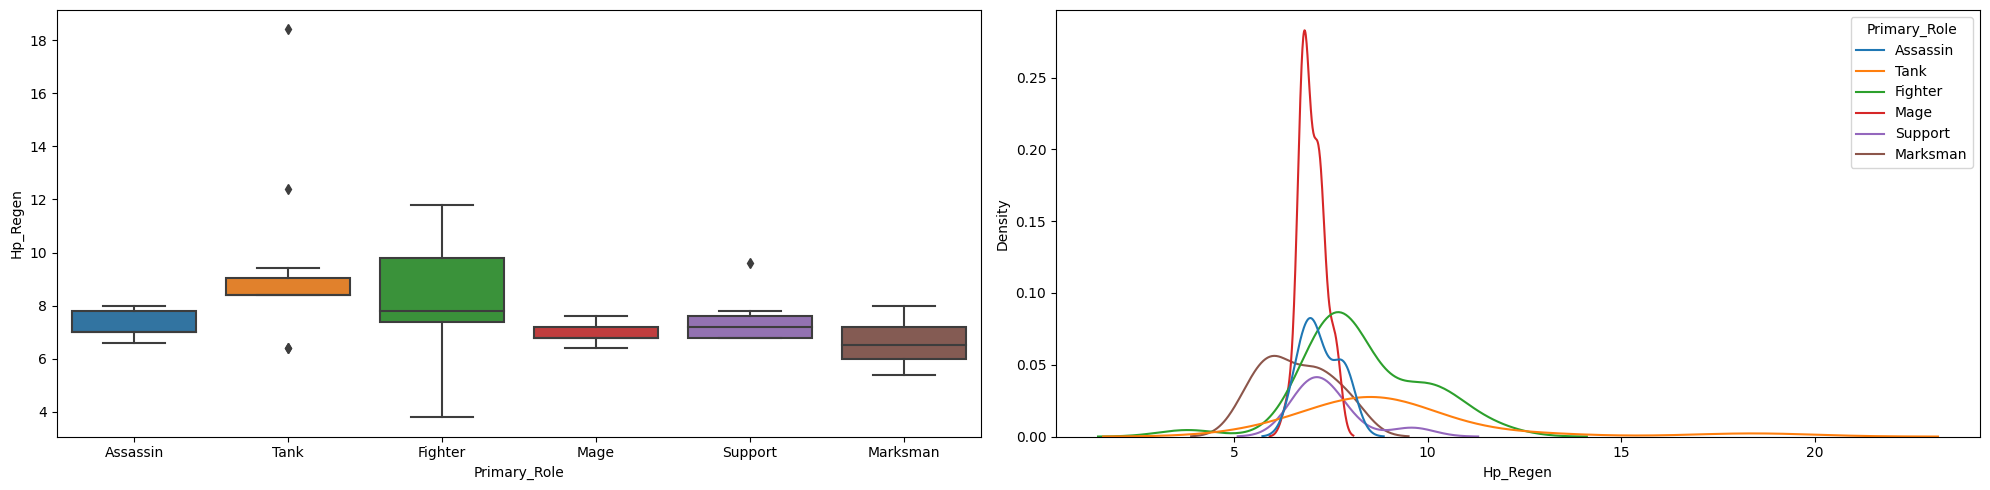

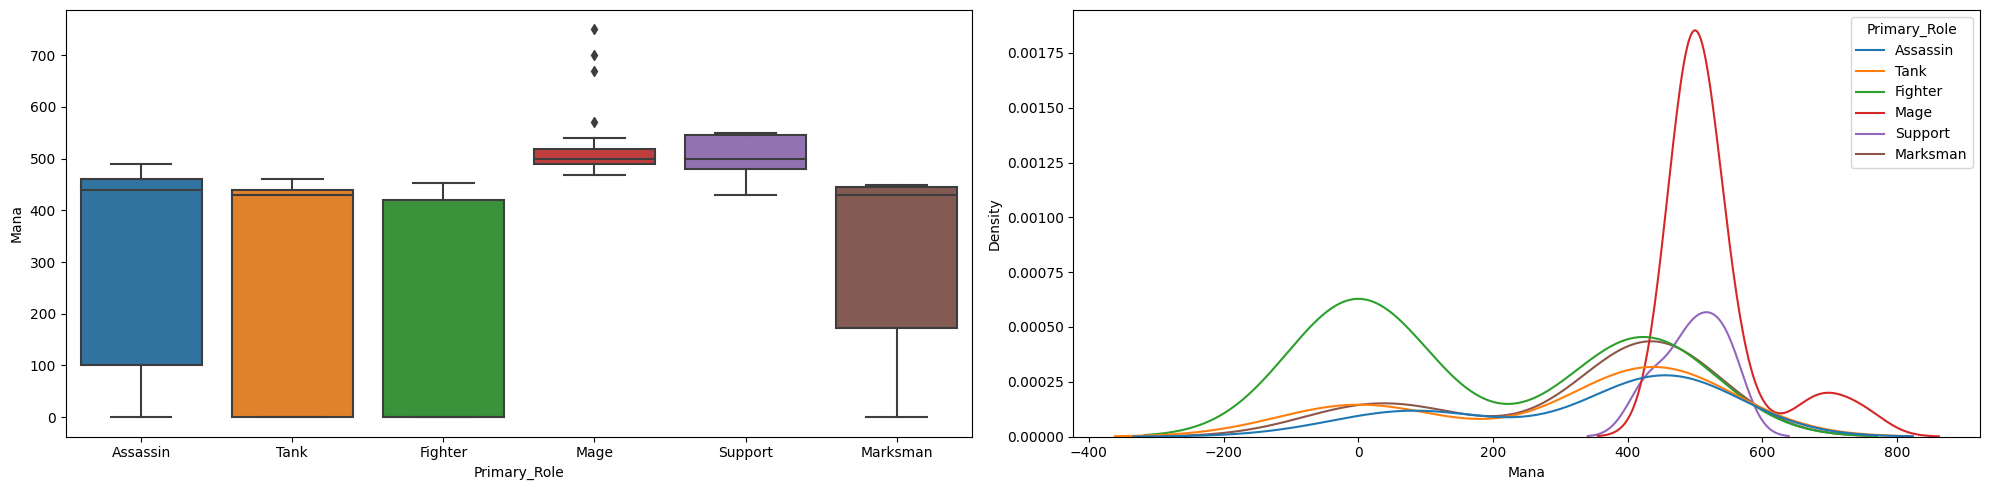

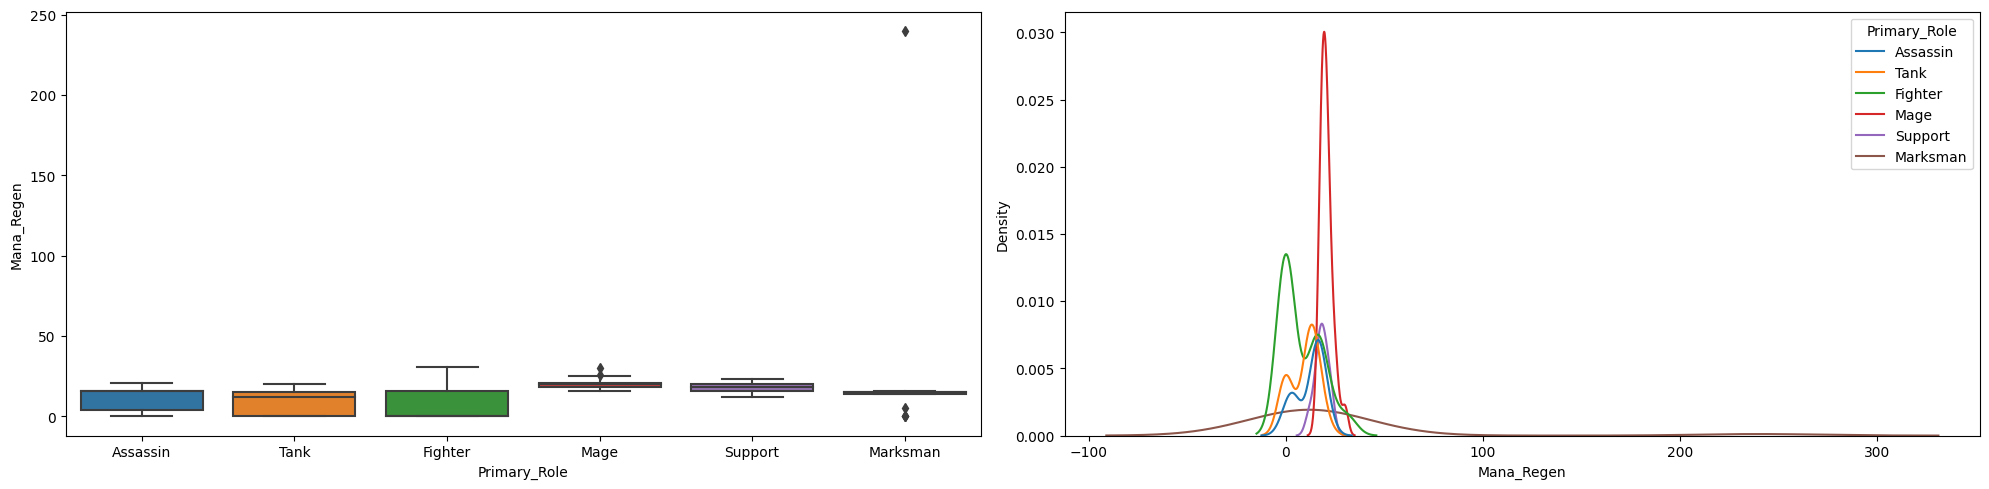

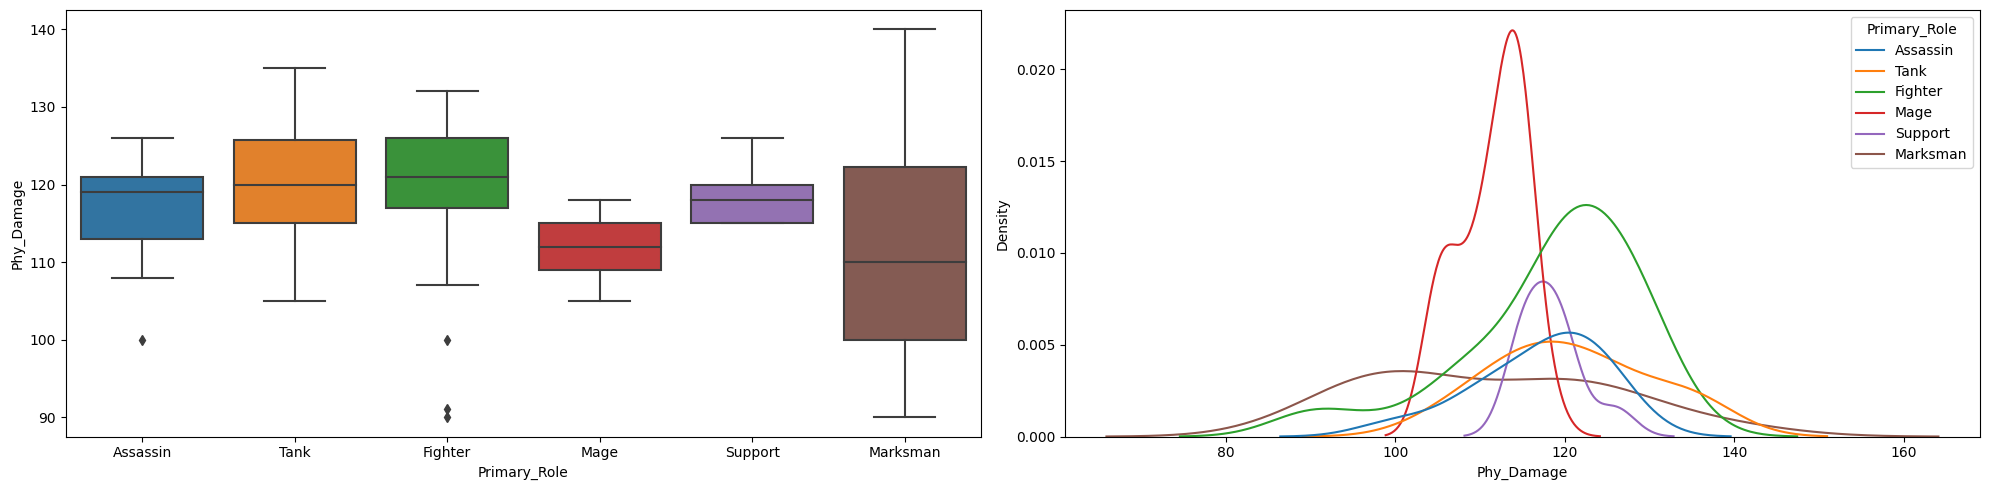

<ipython-input-14-53ed7bc203ed>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=i, hue="Primary_Role", ax=axes[1])


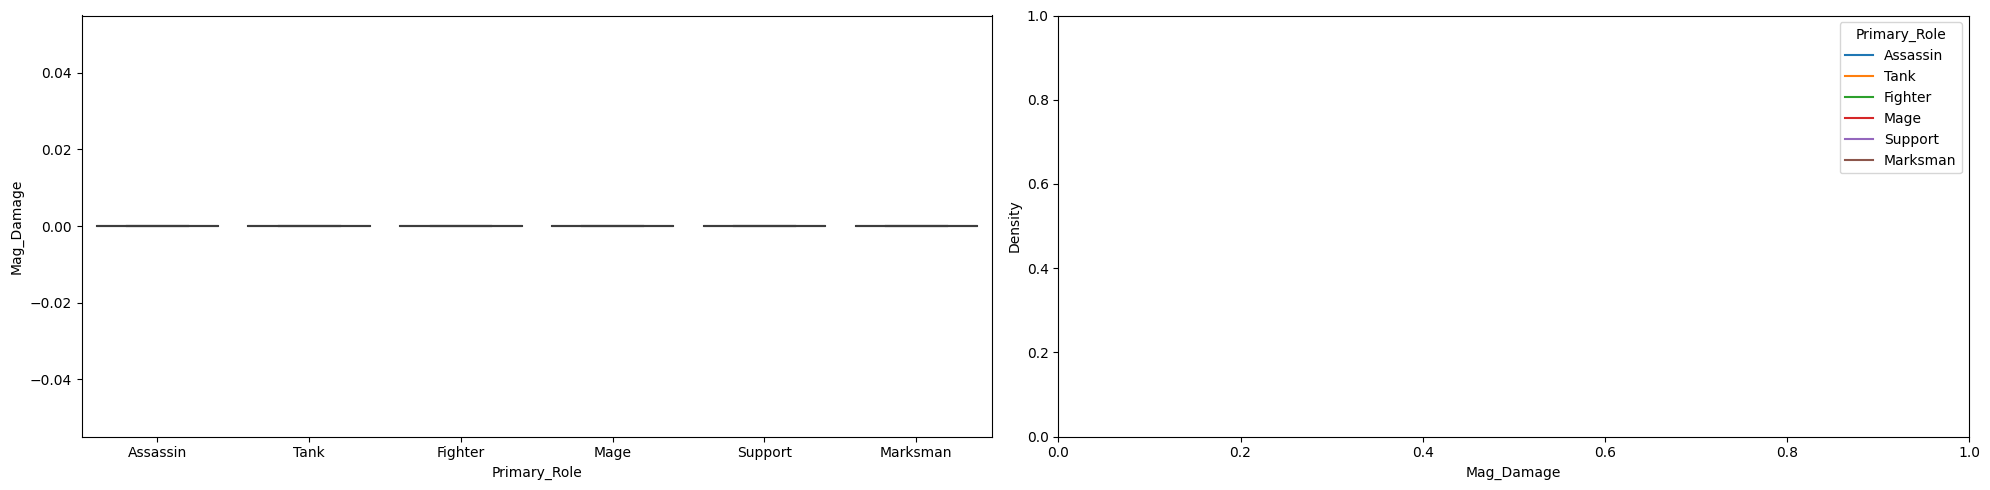

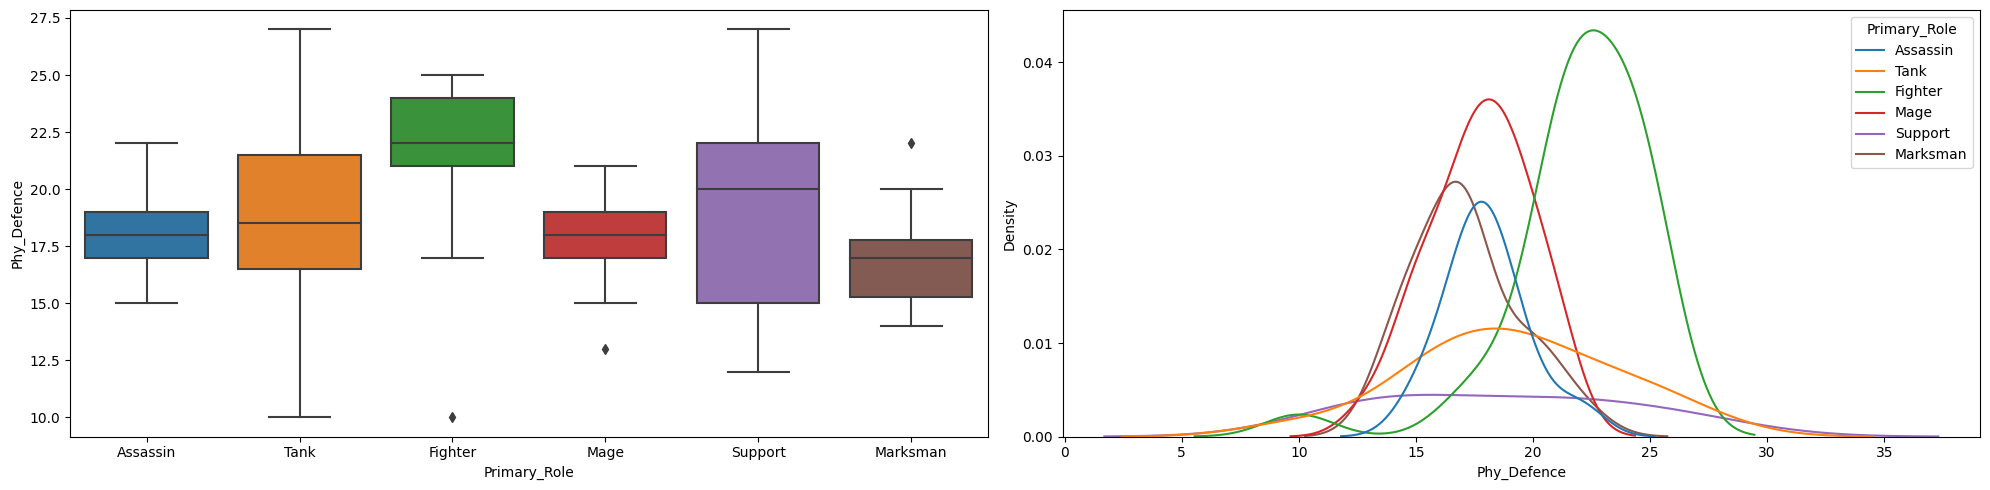

<ipython-input-14-53ed7bc203ed>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=i, hue="Primary_Role", ax=axes[1])
<ipython-input-14-53ed7bc203ed>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=i, hue="Primary_Role", ax=axes[1])
<ipython-input-14-53ed7bc203ed>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=i, hue="Primary_Role", ax=axes[1])


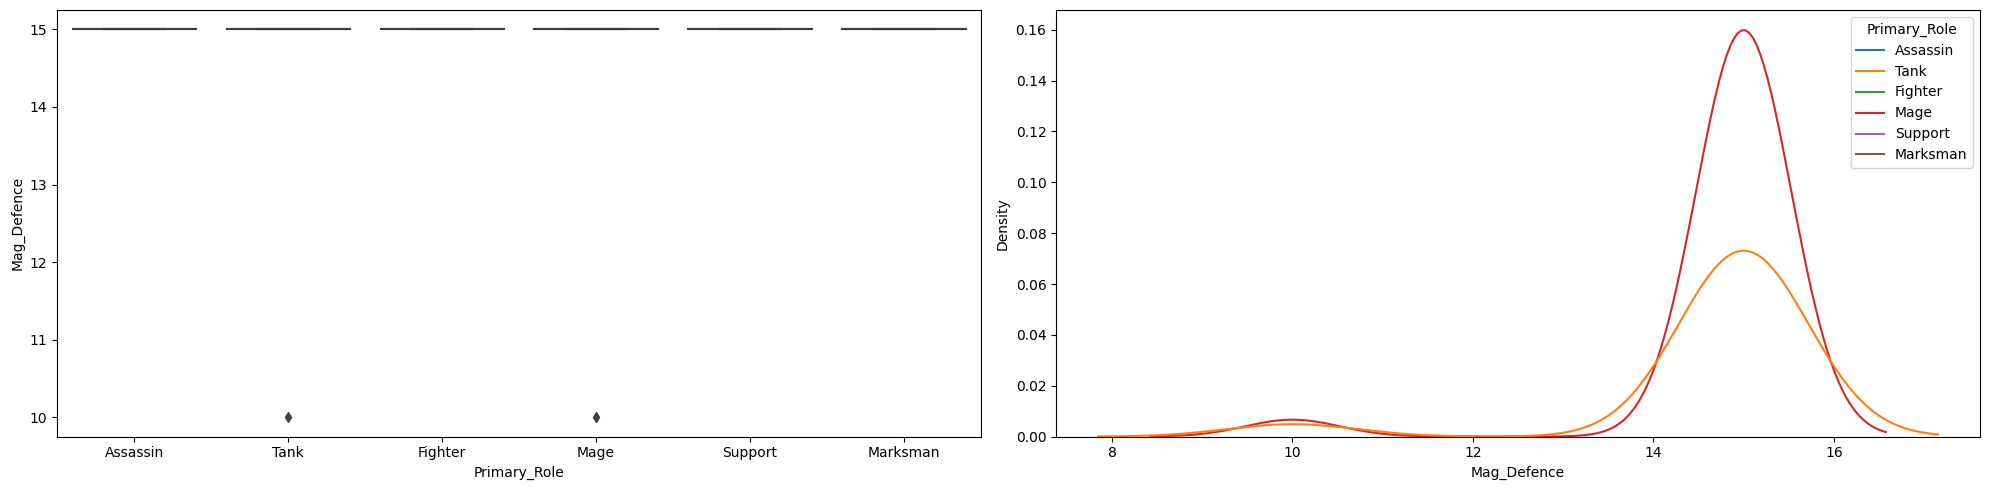

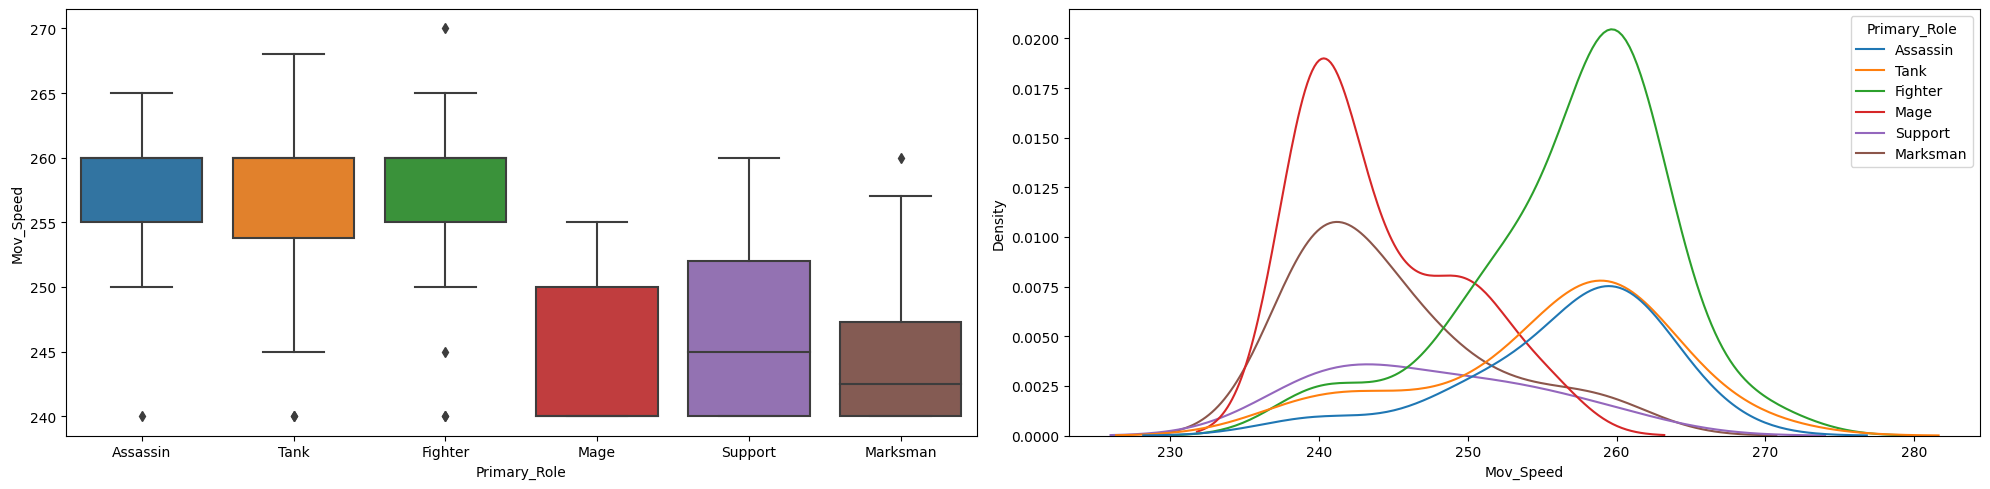

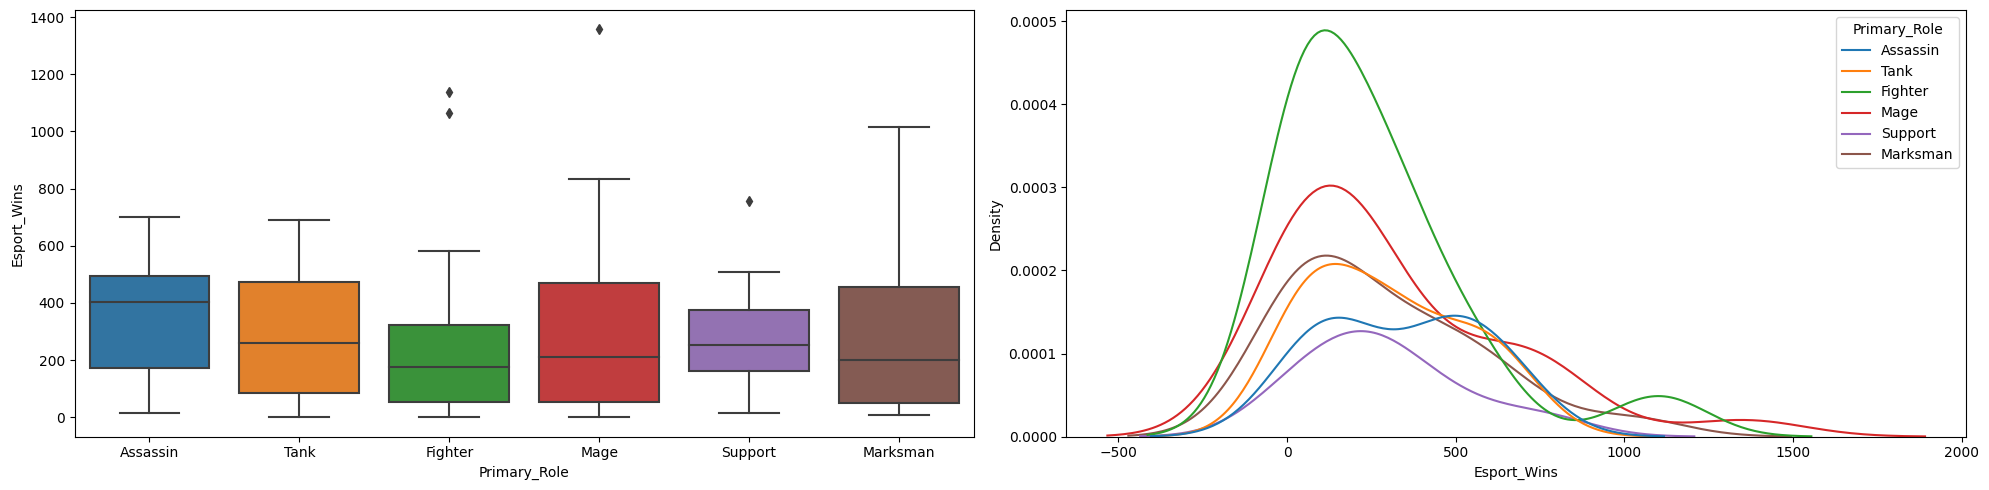

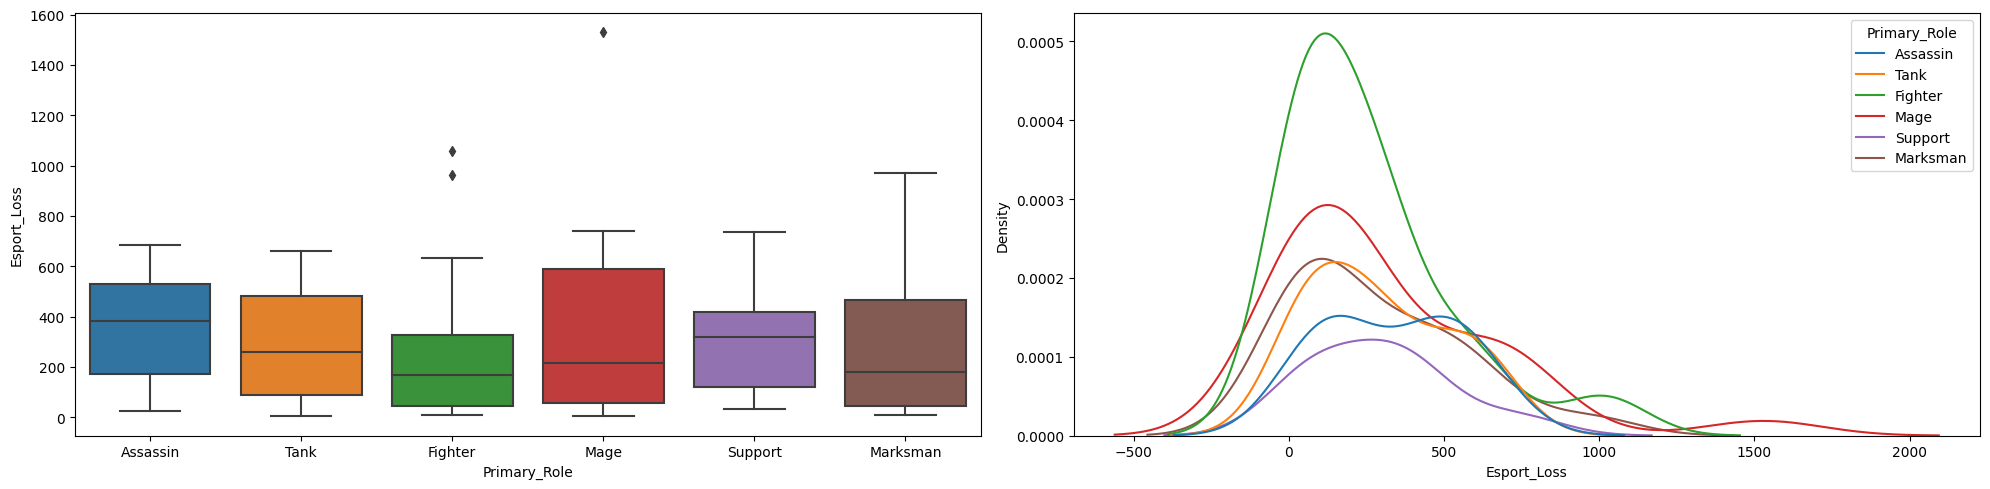

In [14]:
for i in df.columns[7:].tolist():
  f, axes = plt.subplots(1, 2)
  plt.rcParams["figure.figsize"] = [20, 5]
  plt.rcParams["figure.autolayout"] = True

  sns.boxplot(x="Primary_Role", y=i, data=df, ax=axes[0])
  sns.kdeplot(data=df, x=i, hue="Primary_Role", ax=axes[1])
  plt.show()

Above are the rest of the stats split similar to what was done previously. Nothing much interesting except that fighters generally have higher physical defense and movement speed compared to the other role types. You would imagine that tanks would have higher physical defense and assassins should have higher movement speed but that doesn't seem to be the case here!

After having a better understanding of the distribution of stats of each of the hero class, we can proceed to sort each of the heroes stats grouped by their primary roles. I will use the dense rank method to sort them.

In [15]:
df["rank_PR_Hp"] = df.groupby("Primary_Role")["Hp"].rank(method="dense", ascending=False)
df

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss,rank_PR_Hp
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42,3.0
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524,6.0
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92,13.0
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352,6.0
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Yi_Sun-Shin,Paenlong Legend,Secondary Role,2017,Assassin,Marksman,Jungler,2570,7.2,438,15.0,100,0,22,15,250,443,383,7.0
110,Yu_Zhong,Black Dragon,"I would rather betray the world, than let the ...",2020-06-19,Fighter,NaN,EXP Lane,2698,11.8,0,0.0,129,0,21,15,245,550,594,15.0
111,Yve,Astrowarden,"Among the planes exists the equilibrium, which...",2021-02-12,Mage,NaN,Mid,2651,7.2,510,21.0,115,0,19,15,255,834,722,2.0
112,Zhask,Planes Dominator,"Grovel before your King, human!",2017-11-27,Mage,NaN,Mid,2401,6.8,490,20.0,107,0,15,15,240,37,46,17.0


Seems like the rank of HP has been nicely sorted by their primary roles. Let's proceed to sort the rest of the stats by primary role and sort by supposed lanes as well.

In [16]:
for i in df.columns[7:16].tolist():
  j = (str("rank_PR_" + i))
  df[j] = df.groupby("Primary_Role")[i].rank(method="dense", ascending=False)

for i in df.columns[7:16].tolist():
  k = (str("rank_Lane_" + i))
  df[k] = df.groupby("Lane")[i].rank(method="dense", ascending=False)

df

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,...,rank_PR_Mov_Speed,rank_Lane_Hp,rank_Lane_Hp_Regen,rank_Lane_Mana,rank_Lane_Mana_Regen,rank_Lane_Phy_Damage,rank_Lane_Mag_Damage,rank_Lane_Phy_Defence,rank_Lane_Mag_Defence,rank_Lane_Mov_Speed
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,...,4.0,6.0,2.0,4.0,1.0,9.0,1.0,5.0,1.0,4.0
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,...,2.0,6.0,7.0,11.0,8.0,10.0,1.0,3.0,1.0,1.0
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,...,4.0,12.0,5.0,9.0,4.0,3.0,1.0,5.0,1.0,5.0
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,...,4.0,22.0,14.0,2.0,4.0,13.0,1.0,5.0,1.0,10.0
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,...,4.0,18.0,12.0,5.0,1.0,8.0,1.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Yi_Sun-Shin,Paenlong Legend,Secondary Role,2017,Assassin,Marksman,Jungler,2570,7.2,438,...,4.0,10.0,5.0,7.0,4.0,12.0,1.0,2.0,1.0,4.0
110,Yu_Zhong,Black Dragon,"I would rather betray the world, than let the ...",2020-06-19,Fighter,NaN,EXP Lane,2698,11.8,0,...,8.0,15.0,1.0,12.0,9.0,3.0,1.0,5.0,1.0,9.0
111,Yve,Astrowarden,"Among the planes exists the equilibrium, which...",2021-02-12,Mage,NaN,Mid,2651,7.2,510,...,1.0,2.0,2.0,8.0,5.0,2.0,1.0,3.0,1.0,1.0
112,Zhask,Planes Dominator,"Grovel before your King, human!",2017-11-27,Mage,NaN,Mid,2401,6.8,490,...,4.0,16.0,4.0,12.0,6.0,9.0,1.0,7.0,1.0,4.0


In [17]:
df_pr = df.iloc[:, [0,4,18,19,20,21,22,23,24,25,26]]
df_pr

,Name,Primary_Role,rank_PR_Hp,rank_PR_Hp_Regen,rank_PR_Mana,rank_PR_Mana_Regen,rank_PR_Phy_Damage,rank_PR_Mag_Damage,rank_PR_Phy_Defence,rank_PR_Mag_Defence,rank_PR_Mov_Speed
0,Aamon,Assassin,3.0,1.0,4.0,1.0,7.0,1.0,3.0,1.0,4.0
1,Akai,Tank,6.0,7.0,6.0,3.0,8.0,1.0,3.0,1.0,2.0
2,Aldous,Fighter,13.0,5.0,7.0,3.0,2.0,1.0,5.0,1.0,4.0
3,Alice,Mage,6.0,2.0,13.0,8.0,3.0,1.0,1.0,1.0,4.0
4,Alpha,Fighter,18.0,10.0,1.0,1.0,6.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
109,Yi_Sun-Shin,Assassin,7.0,4.0,7.0,4.0,11.0,1.0,1.0,1.0,4.0
110,Yu_Zhong,Fighter,15.0,1.0,10.0,8.0,2.0,1.0,5.0,1.0,8.0
111,Yve,Mage,2.0,2.0,8.0,5.0,2.0,1.0,3.0,1.0,1.0
112,Zhask,Mage,17.0,4.0,14.0,6.0,9.0,1.0,7.0,1.0,4.0


We will then aggregate the stats of the primary roles by their rank into a mean and sort once again by dense sorting to find the overall rank of the heroes by primary role and visualise the table head below.

In [19]:
df_pr['overall_primary_role_rank'] = df_pr.mean(axis=1)
df_pr['overall_primary_role_rank'] = df_pr.groupby("Primary_Role")['overall_primary_role_rank'].rank(method="dense", ascending=True)
df_pr

<ipython-input-19-8a84c7f26203>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pr['overall_primary_role_rank'] = df_pr.mean(axis=1)
<ipython-input-19-8a84c7f26203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr['overall_primary_role_rank'] = df_pr.mean(axis=1)
<ipython-input-19-8a84c7f26203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Name,Primary_Role,rank_PR_Hp,rank_PR_Hp_Regen,rank_PR_Mana,rank_PR_Mana_Regen,rank_PR_Phy_Damage,rank_PR_Mag_Damage,rank_PR_Phy_Defence,rank_PR_Mag_Defence,rank_PR_Mov_Speed,overall_primary_role_rank
0,Aamon,Assassin,3.0,1.0,4.0,1.0,7.0,1.0,3.0,1.0,4.0,2.0
1,Akai,Tank,6.0,7.0,6.0,3.0,8.0,1.0,3.0,1.0,2.0,9.0
2,Aldous,Fighter,13.0,5.0,7.0,3.0,2.0,1.0,5.0,1.0,4.0,5.0
3,Alice,Mage,6.0,2.0,13.0,8.0,3.0,1.0,1.0,1.0,4.0,8.0
4,Alpha,Fighter,18.0,10.0,1.0,1.0,6.0,1.0,1.0,1.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Yi_Sun-Shin,Assassin,7.0,4.0,7.0,4.0,11.0,1.0,1.0,1.0,4.0,8.0
110,Yu_Zhong,Fighter,15.0,1.0,10.0,8.0,2.0,1.0,5.0,1.0,8.0,12.0
111,Yve,Mage,2.0,2.0,8.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0
112,Zhask,Mage,17.0,4.0,14.0,6.0,9.0,1.0,7.0,1.0,4.0,19.0


In [ ]:
df_pr_1 = df_pr.iloc[:, [0,1,-1]].sort_values(by=['Primary_Role','overall_primary_role_rank'])
df_pr_1

,Name,Primary_Role,overall_primary_role_rank
87,Natalia,Assassin,1.0
0,Aamon,Assassin,2.0
62,Karina,Assassin,2.0
46,Gusion,Assassin,3.0
52,Helcurt,Assassin,4.0
...,...,...,...
38,Fredrinn,Tank,10.0
40,Gatotkaca,Tank,11.0
17,Belerick,Tank,12.0
100,Uranus,Tank,12.0


It seems that the sorting seems to be working fine. We will proceed to sort for the overall lane rank as well and output the results for the top 5 overall rank by primary role and lane.

In [ ]:
df_lane = df.iloc[:, [0,6,27,28,29,30,31,32,33,34,35]]
df_lane['overall_lane_rank'] = df_lane.mean(axis=1)
df_lane['overall_lane_rank'] = df_lane.groupby("Lane")['overall_lane_rank'].rank(method="dense", ascending=True)
df_lane_1 = df_lane.iloc[:, [0,1,-1]].sort_values(by=['Lane','overall_lane_rank'])
df_lane_1

<ipython-input-39-17e6234c1e26>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_lane['overall_lane_rank'] = df_lane.mean(axis=1)
<ipython-input-39-17e6234c1e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lane['overall_lane_rank'] = df_lane.mean(axis=1)
<ipython-input-39-17e6234c1e26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Name,Lane,overall_lane_rank
90,Phoveus,EXP Lane,1.0
58,Julian,EXP Lane,2.0
98,Terizla,EXP Lane,3.0
97,Silvanna,EXP Lane,4.0
2,Aldous,EXP Lane,5.0
...,...,...,...
36,Floryn,Roamer,12.0
40,Gatotkaca,Roamer,12.0
32,Estes,Roamer,13.0
17,Belerick,Roamer,14.0


Best Stats for Starting Primary Roles

Primary Roles / Rank| 1st | 2nd | 3rd
--------------------|------------------ |------------------ |------------------
Assassin            | Natalia | Aamon / Karina | Gusion
Tank                | Grock| Kufra | Atlas / Gloo  
Fighter             | Phoveus | Julian | Terizla
Mage                | Yve | Valentina | Xavier
Support             | Lolita | Carmilla | Mathilda / Rafaela
Marksman            | Clint / Karrie | Melissa | Bruno

Best Stats for Starting Laners

Lane / Rank  | 1st | 2nd | 3rd
-------------|------------------ |------------------ |------------------
Mid          | Yve | Valentina | Xavier
Roamer       | Gloo / Grock | Atlas / Lolita | Khufra
EXP Lane     | Phoveus | Julian | Terizla
Gold Lane    | Clint / Karrie | Melissa | Bruno
Jungler      | Roger | Baxia | Natalia

Above 2 tables show the top 3 best stats for starting primary roles and starting laners. As you can see, there are some overlaps between some of them, such as Yve, Valentina, Grock, etc. Interestingly, even today, in December 2023, we can see some of them being played quite frequently by the top e-sports teams and still being very relevant to the current meta.

Does the above best overall starting stats by primary roles and laners surprise you? Hope this is helpful and thanks for reading through.